In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sms

%matplotlib inline


In [5]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [7]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [8]:
df_airline.dropna(axis=0,inplace=True)

In [9]:
df_airline.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [10]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [11]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [12]:
## converting obj to datetime ie is month feature
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [13]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [14]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [15]:
## converting month as index
df_airline.set_index('Month', inplace= True)

In [16]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


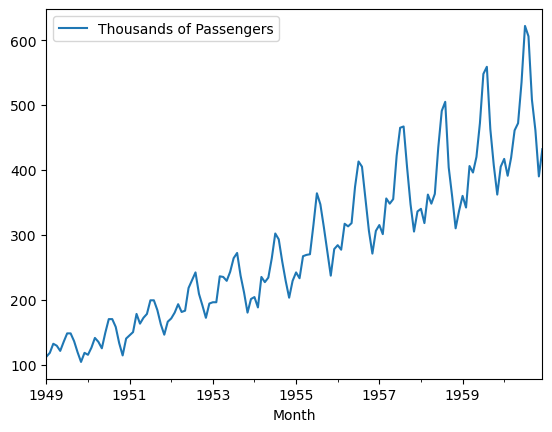

In [17]:
df_airline.plot()
plt.show()

since we found the data is seasonal data

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_test(series):
    result= adfuller(series)
    print('ADF statistics: {}'.format(result[0]))
    print('P value : {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence agianst the null hypothisis, reject the null hypothisis. Data has no unit root and is stationary")
    else:
        print("weak evidence agianst the null hypothisis, time series has a unit root, indicating it is non-stationary data  ")

In [20]:
adf_test(df_airline['Thousands of Passengers'])

ADF statistics: 0.8153688792060511
P value : 0.991880243437641
weak evidence agianst the null hypothisis, time series has a unit root, indicating it is non-stationary data  


In [21]:
## Use technique differencing
df_airline['passengers first differencing']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [22]:
df_airline.head()

,Thousands of Passengers,passengers first differencing
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [23]:
adf_test(df_airline['passengers first differencing'].dropna())

ADF statistics: -2.8292668241699874
P value : 0.05421329028382711
weak evidence agianst the null hypothisis, time series has a unit root, indicating it is non-stationary data  


In [31]:
## Use technique differencing
df_airline['passengers second difference']=df_airline['passengers first differencing']-df_airline['passengers first differencing'].shift(1)

In [32]:
adf_test(df_airline['passengers second difference'].dropna())

ADF statistics: -16.384231542468523
P value : 2.7328918500141235e-29
strong evidence agianst the null hypothisis, reject the null hypothisis. Data has no unit root and is stationary


In [35]:
## as we know it is seasonal data but ARIMA is good for the stationary data so we done for the 12 months to check again to see the result
## Use technique differencing
df_airline['passengers 12 difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [36]:
adf_test(df_airline['passengers 12 difference'].dropna())

ADF statistics: -3.3830207264924796
P value : 0.011551493085515008
strong evidence agianst the null hypothisis, reject the null hypothisis. Data has no unit root and is stationary


In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

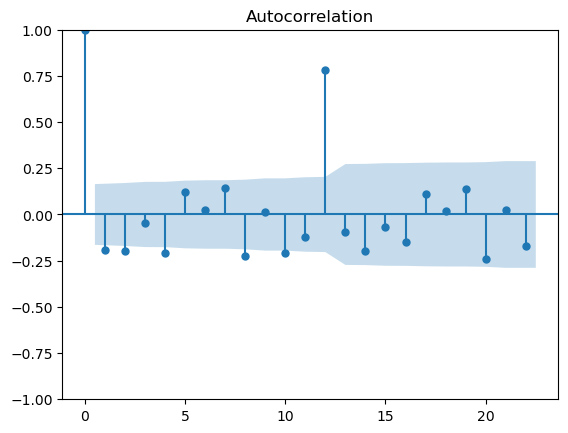

In [38]:
plot_acf(df_airline["passengers second difference"].dropna())

#### here the impact is from the 0 to 12 in the x axis so the Q value will be the 13 and also we seen the huge imapact suddenly after the 0 in the x axis inshort since this is from 1 to 13 we can there some seasonality  so we also see in the 12 diffrencing  

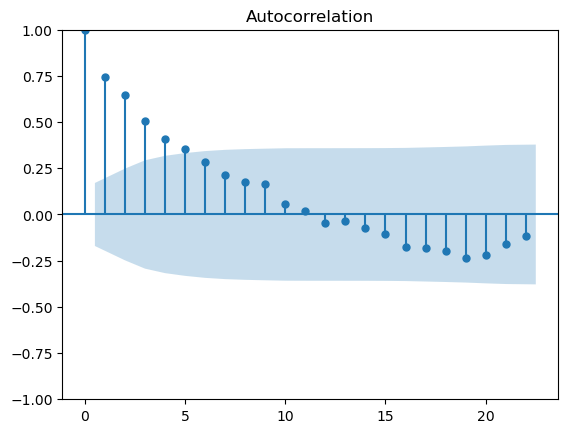

In [44]:
plot_acf(df_airline["passengers 12 difference"].dropna())

#### here the impact is 0 to 5 in the x axis and the q value of it is 5 (it reached it's upper bound) 
* the time series bound increases the error will be increased

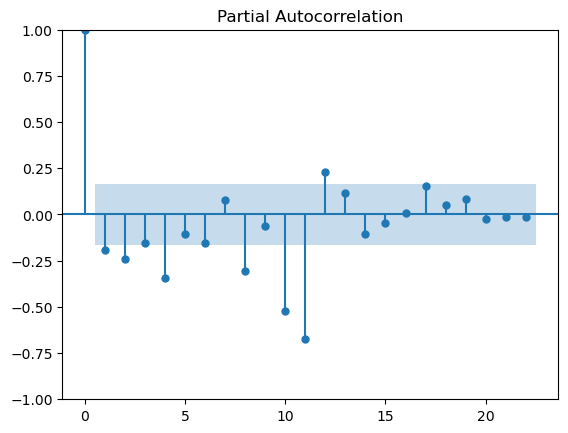

In [43]:
plot_pacf(df_airline["passengers second difference"].dropna())


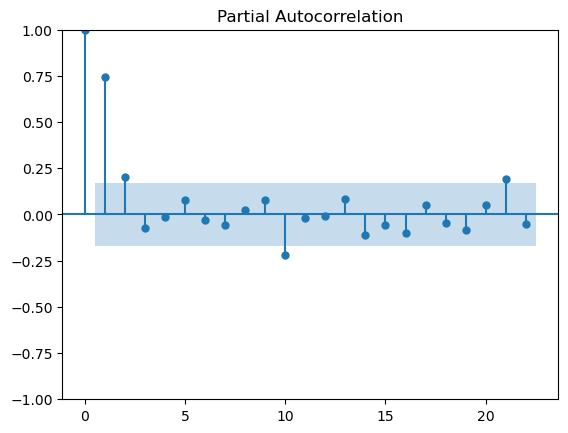

In [46]:
plot_pacf(df_airline["passengers 12 difference"].dropna())

#### here we see the p value 2 and then the 10 will be impact much so we have try the both the value

In [48]:
df_airline.head()

,Thousands of Passengers,passengers first differencing,passengers second difference,passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [49]:
## Train and test 
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [50]:
train_data=df_airline[:train_dataset_end]
test_data= df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [51]:
## prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [52]:
test_data

,Thousands of Passengers,passengers first differencing,passengers second difference,passengers 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [61]:
## create the ARIMA model 
from statsmodels.tsa.arima.model import ARIMA

In [54]:
train_data

,Thousands of Passengers,passengers first differencing,passengers second difference,passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [86]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order=(4,2,3))

D:\jupyter nb\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\jupyter nb\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\jupyter nb\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [87]:
model_arima_fit = model_ARIMA.fit()

D:\jupyter nb\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(4, 2, 3)   Log Likelihood                -355.974
Date:                     Wed, 14 Jan 2026   AIC                            727.949
Time:                             15:38:37   BIC                            747.202
Sample:                         01-01-1949   HQIC                           735.679
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3330      0.134     -2.490      0.013      -0.595      -0.071
ar.L2         -0.8534      0.134     -6.368      0.000      -1.116      -0.591
ar.L3          0.1164      0.135      0.864      0.387      -0.148       0.380
ar.L4         -0.4245      0.134     -3.164      0.002      -0.687      -0.162
ma.L1         -0.2988     35.620     -0.008      0.993     -70.113      69.516
ma.L2          0.2859     24.972      0.011      0.991     -48.659      49.231
ma.L3         -0.9869     35.219     -0.028      0.978     -70.014      68.040
sigma2       306.4897   1.09e+04      0.028      0.978   -2.11e+04    2.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.60   Prob(JB):                         0.77
Heteroskedasticity (H):               3.64   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
## prediction 
pred_start_date = test_data.index[0]
pred_end_date =  test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [90]:
pred= model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred

In [91]:
residuals

Month
1956-01-01    -18.948061
1956-02-01    -16.263903
1956-03-01     16.121690
1956-04-01     15.690140
1956-05-01     32.514347
1956-06-01     71.331264
1956-07-01    104.405399
1956-08-01    107.700672
1956-09-01     46.774499
1956-10-01     -6.826152
1956-11-01    -32.343140
1956-12-01     -7.844230
1957-01-01     -4.541653
1957-02-01     -9.829693
1957-03-01     36.680750
1957-04-01     22.663529
1957-05-01     37.141115
1957-06-01     96.896882
1957-07-01    133.627351
1957-08-01    142.118257
1957-09-01     73.086796
1957-10-01      9.697518
1957-11-01    -26.814439
1957-12-01     -0.849809
1958-01-01     -3.243632
1958-02-01    -20.670044
1958-03-01     19.144579
1958-04-01     -1.175206
1958-05-01     17.543831
1958-06-01     86.066905
1958-07-01    135.888325
1958-08-01    152.824857
1958-09-01     48.933168
1958-10-01     -2.056765
1958-11-01    -48.833509
1958-12-01    -24.248420
1959-01-01     -7.014852
1959-02-01    -23.435997
1959-03-01     38.531180
1959-04-01     23.0

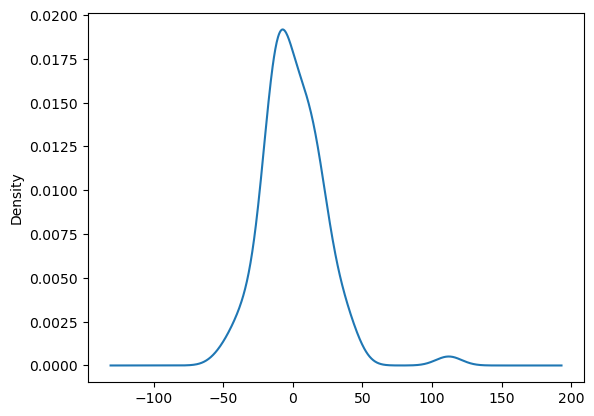

In [92]:
model_arima_fit.resid.plot(kind='kde')
plt.show()

C:\Users\visnu srithar\AppData\Local\Temp\ipykernel_26260\2733866995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_arima']=pred


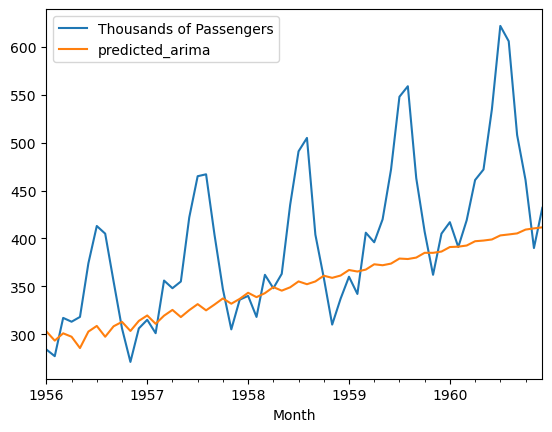

In [93]:
test_data['predicted_arima']=pred
test_data[['Thousands of Passengers','predicted_arima']].plot()
plt.show()

In [94]:
## create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [95]:
model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

D:\jupyter nb\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\jupyter nb\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [96]:
model_sarimax_fit = model_SARIMAX.fit()

D:\jupyter nb\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [97]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Wed, 14 Jan 2026   AIC                            548.481
Time:                                     15:38:57   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5995      0.939      0.638      0.523      -1.241       2.440
ar.L2          0.8314      0.232      3.577      0.000       0.376       1.287
ar.L3         -0.4539      0.896     -0.507      0.612      -2.209       1.301
ma.L1          0.1825      1.171      0.156      0.876      -2.112       2.477
ma.L2         -0.5355      1.269     -0.422      0.673      -3.023       1.952
ma.L3         -0.0986      0.386     -0.255      0.799      -0.856       0.659
ma.L4         -0.1270      0.340     -0.374      0.708      -0.793       0.539
ma.L5          0.2471      0.358      0.690      0.490      -0.455       0.949
sigma2        87.7135     81.766      1.073      0.283     -72.545     247.972
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
## prediction 
pred_start_date = test_data.index[0]
pred_end_date =  test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [99]:
pred_sarimax= model_sarimax_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred_sarimax

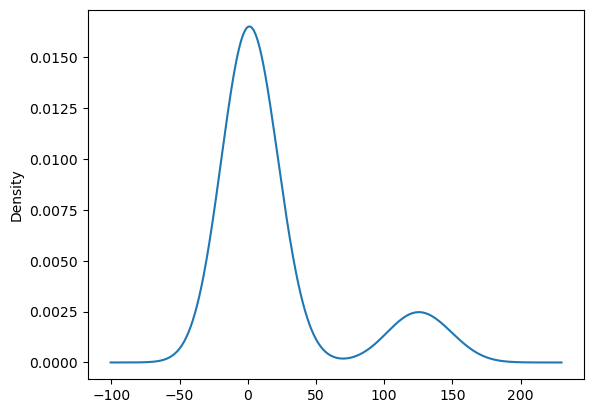

In [100]:
model_sarimax_fit.resid.plot(kind='kde')
plt.show()

In [101]:
test_data['predicted_sarimax']=pred_sarimax

C:\Users\visnu srithar\AppData\Local\Temp\ipykernel_26260\542087798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_sarimax']=pred_sarimax


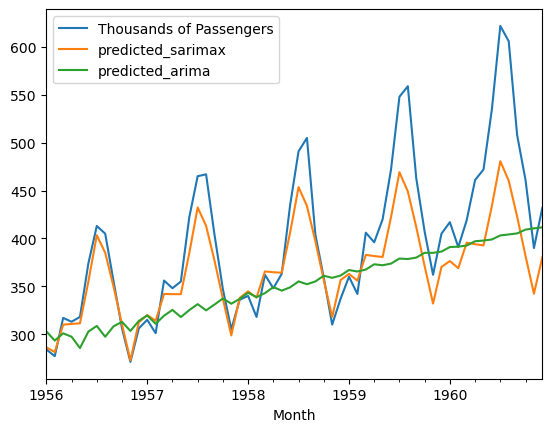

In [102]:
test_data[['Thousands of Passengers','predicted_sarimax','predicted_arima']].plot()
plt.show()

## Here we the comparision between ARIMA and SARIMAX 
* since it is a seasonal data so SARIMAX works well than the ARIMA